# Plotlyを使ってGanttを作ってみる。 
2023/7/29

事前準備ライブラリのインストール
参考になるURL

In [ ]:
## Package Install
## ターミナルで以下を実行する。
# pip install -U plotly
# pip install -U pydbc
# pip install -U matplotlib
# pip install -U pygwalker
# pip install -U statsmodels
# pip install -U bokeh
# pip install -U msticpy

## URL
# https://plotly.com/graphing-libraries/ # plotly library introduction

必要なライブラリを有効化する

In [1]:
import pandas as pd 
import pyodbc
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

In [11]:
from bokeh.plotting import figure, show
 
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
 
# create a new plot with a title and axis labels
p = figure(title="シンプルな線の例", x_axis_label='x', y_axis_label='y')
 
# add a line renderer with legend and line thickness to the plot
p.line(x, y, legend_label="Temp.", line_width=2)
 
# show the results
show(p)

DBからDFにデータを展開する(sqlserver)

In [17]:
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'yutakaPC\SQLEXPRESS' 
database = 'MYDB' 
username = 'DB_User' 
password = 'DB_User'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
# select 26 rows from SQL table to insert in dataframe.
query = "select * from [MYDB].[TRN_LOT_PROCESS] order by Resource,Start,Finish,Object;"
df = pd.read_sql(query, cnxn)
df['Key'] = df['Resource'] + '-' + df['Object']
df['Task'] = df['Object'] 
#print(df.sort_values(by=['Resource','Start'])['Key'])
print(df.head(26))

   Resource   Object Status               Start              Finish  \
0         A  JOB-001   WAIT 2023-07-30 08:58:00 2023-07-30 10:24:00   
1         A  JOB-011   WAIT 2023-07-30 09:18:00 2023-07-30 15:45:00   
2         A  JOB-010    RUN 2023-07-30 09:23:00 2023-07-30 16:09:00   
3         A  JOB-002   WAIT 2023-07-30 09:25:00 2023-07-30 10:24:00   
4         A  JOB-003   WAIT 2023-07-30 09:28:00 2023-07-30 14:34:00   
5         A  JOB-012    RUN 2023-07-30 09:29:00 2023-07-30 16:23:00   
6         B  JOB-004    RUN 2023-07-30 09:03:00 2023-07-30 10:54:00   
7         B  JOB-013   WAIT 2023-07-30 09:16:00 2023-07-30 13:57:00   
8         B  JOB-005   WAIT 2023-07-30 09:27:00 2023-07-30 13:42:00   
9         B  JOB-014    RUN 2023-07-30 09:28:00 2023-07-30 09:39:00   
10        B  JOB-006   WAIT 2023-07-30 09:38:00 2023-07-30 19:08:00   
11        B  JOB-015   WAIT 2023-07-30 09:57:00 2023-07-30 12:44:00   
12        C  JOB-007   WAIT 2023-07-30 09:00:00 2023-07-30 23:00:00   
13    

C:\Users\nishi\AppData\Local\Temp\ipykernel_27036\1966829176.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [30]:
import numpy as np

# Bokeh libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

# My word count data
day_num = np.linspace(1, 10, 10)
daily_words = [450, 628, 488, 210, 287, 791, 508, 639, 397, 943]
cumulative_words = np.cumsum(daily_words)

# Output the visualization directly in the notebook
output_notebook()

# Create a figure with a datetime type x-axis
fig = figure(title='My Tutorial Progress',
             #plot_height=400, plot_width=700,
             x_axis_label='Day Number', y_axis_label='Words Written',
             x_minor_ticks=2, y_range=(0, 6000),
             toolbar_location=None)

# The daily words will be represented as vertical bars (columns)
fig.vbar(x=day_num, bottom=0, top=daily_words, 
         color='blue', width=0.75, 
         legend='Daily')

# The cumulative sum will be a trend line
fig.line(x=day_num, y=cumulative_words, 
         color='gray', line_width=1,
         legend='Cumulative')

# Put the legend in the upper left corner
fig.legend.location = 'top_left'

# Let's check it out
show(fig)

Loading BokehJS ...

KeyError: 'legend'

In [27]:
from msticpy.vis import mp_pandas_plot
from msticpy.vis.timeline_duration import display_timeline_duration

display_timeline_duration(
   df,
   group_by="Key",
   time_column="Start",
   end_time_column="Finish"
   ,source_columns= ("Status","Object")
);



Loading BokehJS ...

In [7]:
# ライブラリーの読み込み
import pandas as pd
from statsmodels.tsa.seasonal import STL #STL分解
import matplotlib.pyplot as plt          #グラフ描写


# データセットの読み込み
url='https://www.salesanalytics.co.jp/591h' #データセットのあるURL
table=pd.read_csv(url,                      #読み込むデータのURL
                  index_col='Month',        #変数「Month」をインデックスに設定
                  parse_dates=True)         #インデックスを日付型に設定

# グラフ設定１
%matplotlib notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]
# プロット
table.plot()
plt.title('Passengers')                            #グラフタイトル
plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
plt.xlabel('Month')                                #ヨコ軸のラベル
plt.show()

PyGWalker を使用する

In [14]:
import pygwalker as pyg
gwalker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

複数のグラフ(Axes)を一つのページ(figure)にプロットする  
方針2: figureオブジェクトではなく、subplotsオブジェクトを生成する。

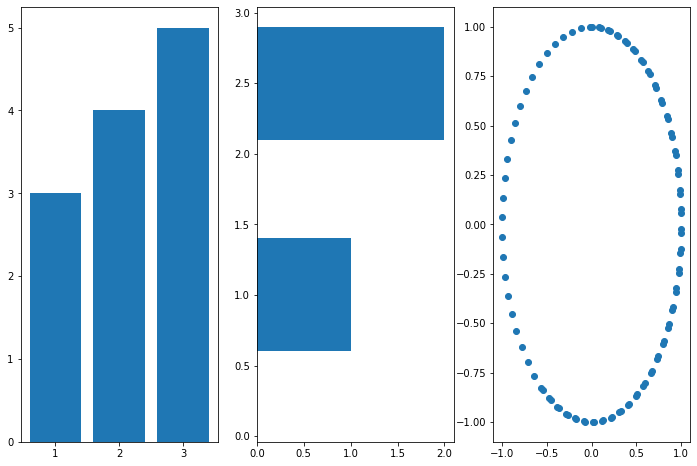

In [6]:
# プロット領域の初期化(今回は1行2列の配列)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

# データのプロット
ax1.bar([1,2,3], [3,4,5])
ax2.barh([0.5, 1, 2.5], [0,1,2])
ax3.scatter(y1,y2)

plt.show()


複数のグラフ(Axes)を一つのページ(figure)にプロットする  
方針1: figureオブジェクト内にadd_subplot()メソッドで追加する。

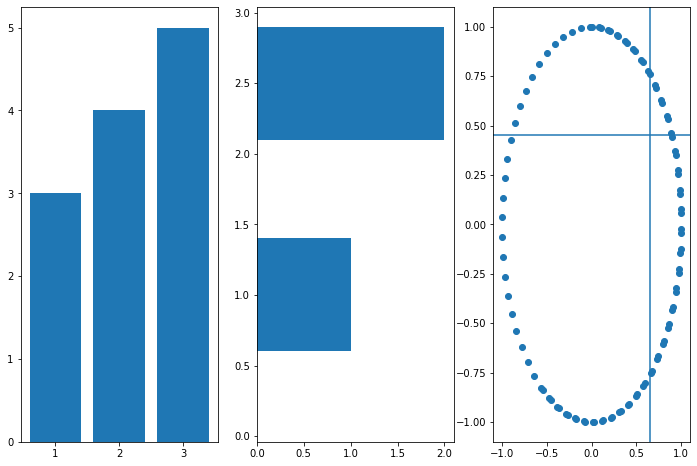

In [4]:
# データ生成
x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = np.cos(x)

# プロット領域(Figure、Axes)の初期化
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# 棒グラフの作成
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax3.scatter(y1,y2)

# 水平線、垂直線を入れる
ax3.axhline(0.45)
ax3.axvline(0.65)

plt.show()



インスタンスを明言してプロットする

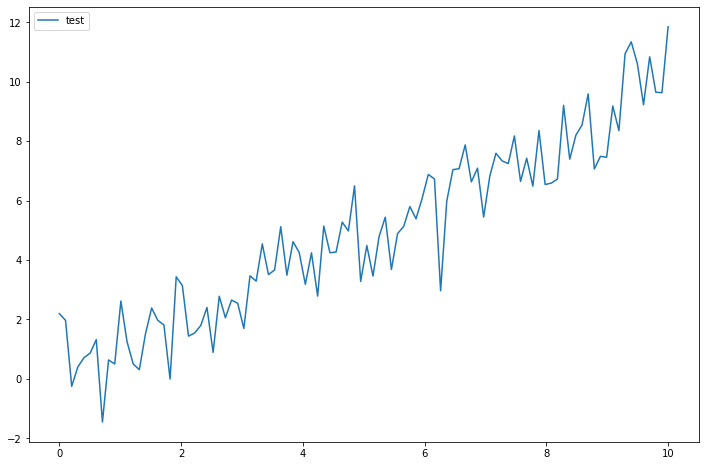

In [2]:
# データ生成
x = np.linspace(0, 10, 100)
y = x + np.random.randn(100) 

# プロット
# plt.plot(x, y, label="test")

# Figureの初期化
fig = plt.figure(figsize=(12,8))

# Figure内にAxesを追加()
ax = fig.add_subplot(111)
ax.plot(x,y,label="test")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

ガントチャートを作りたい

In [10]:
# df = pd.DataFrame([
#     dict(Resource="A",Object="Job A", Status="End",Start='2023-07-29 10:00', Finish='2023-07-29 12:00'),
#     dict(Resource="A",Object="Job C", Status="End",Start='2023-07-30 13:05', Finish='2023-07-30 16:00'),
#     dict(Resource="A",Object="Job B", Status="End",Start='2023-07-29 11:15', Finish='2023-07-29 15:00'),
#     dict(Resource="A",Object="Job F", Status="Abend",Start='2023-07-29 11:15', Finish='2023-07-29 15:00'),
#     dict(Resource="A",Object="Job G", Status="Abend",Start='2023-07-29 11:15', Finish='2023-07-29 15:00'),
#     dict(Resource="A",Object="Job G", Status="Abend",Start='2023-07-29 14:15', Finish='2023-07-29 18:00'),
#     dict(Resource="A",Object="Job G", Status="Abend",Start='2023-07-29 19:15', Finish='2023-07-29 21:00'),
#     dict(Resource="A",Object="Job I", Status="Abend",Start='2023-07-29 21:15', Finish='2023-07-29 22:00'),
#     dict(Resource="A",Object="Job I", Status="Abend",Start='2023-07-29 14:15', Finish='2023-07-29 18:00'),
#     dict(Resource="A",Object="Job H", Status="Abend",Start='2023-07-29 11:15', Finish='2023-07-29 15:00'),
#     dict(Resource="B",Object="Job I", Status="Abend",Start='2023-07-29 13:12', Finish='2023-07-29 16:00'),
#     dict(Resource="B",Object="Job D", Status="End",Start='2023-07-31 13:12', Finish='2023-07-31 16:00'),
#     dict(Resource="C",Object="Job E", Status="Abend",Start='2023-07-29 14:03', Finish='2023-07-29 15:00')
# ])

# print(df.head(26))

fig = px.timeline(
    df,                                                 # DF to use 
    title="1st made gantt chart",                       # tittle of this graph
    x_start='Start', x_end='Finish',                    # the column name of DF to use star time & end time column
    y='Key',
    # y='Resource',
    # y='Object',                                           # the column name of DF to use row name  
    text='Object',                                        # the column name of DF to use display
    # pattern_shape='Object',
    opacity= 1,
    color_discrete_map={'RUN': 'Blue','WAIT':'limegreen','DOWN':'red'},
    # facet_row="Resource",
    # width=1200, height=600,
    color='Status'                                      # the column name of DF to use color section
)

# 画面向けのConfig
config = dict(
    {'scrollZoom': True,
        'displaylogo': False,
        'modeBarButtonsToAdd': [
        # 'drawline',  # 直線
        'drawopenpath',  # 自由な線
        # 'drawclosedpath',  # 閉じたフリーフォーム
        # 'drawcircle',  # 円
        # 'drawrect',  # 四角
        'eraseshape',  # 図形の削除
        'toggleSpikelines',  # ホバーしたプロットに垂直・水平な線
        'hoverclosest',  # 直近のプロット1点をホバー
        'hovercompare',  # 直近のプロットと同じxのプロット全点をホバー
        ]
        ,'edits': {
        'axisTitleText': True,  # 軸ラベルの内容の変更を可能に
        }
    }
)

# text font
fig.update_traces(width=1,textfont_size=10, textangle=0, textposition='inside', cliponaxis=False)

# 全体のレイアウト修正
fig.update_layout(
    # showlegend=False,
    legend_x=0.9,
    clickmode='event+select',
    dragmode='pan',

    xaxis_title="Time", 
    yaxis_title="",

    font_size=20,font_family = 'Arial',                 # グラフ全体のフォントサイズ変更
    hoverlabel_bgcolor='#DAEEED',                       # Change the hover tooltip background color to a universal light blue color.
    hoverlabel_font_size=15,
    # textangle = -180,
    # newshape_line_color='red',                          # 
    bargap=0,bargroupgap=0,
    barmode="group"                                     # チャートを並べて表示してくれる。                    
)

# 横軸のレイアウト修正
fig.update_xaxes(
    # setting of tick 
    showticklabels = True,side ="bottom",               # Place the tick labels on the top of the chart
    tickfont_size=15, tickangle = 0,
    tickformat='%Y/%m/%d %H:%M',                        # 横軸の書式を変更                                                        
    # setting of line
    showline = True,linecolor = 'Black',
    zeroline = True,
    showgrid = True,
    type="date",
    # rangeslider=dict(                                   # グラフ下にレンジスライダーを追加
    #     visible=True,
    #     thickness=0.05
    # ),                     
    # rangeselector=dict(                                 # グラフ上にレンジセレクターを追加
    #     # xanchor='center',x=1,
    #     # yanchor='bottom',y=0,        
    #     buttons=list([
    #         dict(
    #             count=3,                                # 数値
    #             label='3h',                             # ボタンラベル
    #             step='hour',                            # 単位
    #             stepmode='backward'                     # 現時点より以前
    #             # stepmode='todate'                     # 一番最初時点から   
    #         ),
    #         dict(
    #             count=6,                                # 数値
    #             label='6h',                             # ボタンラベル
    #             step='hour',                            # 単位
    #             stepmode='backward'                     # 現時点より以前
    #         ),
    #         dict(
    #             count=12,                               # 数値
    #             label='12h',                            # ボタンラベル
    #             step='hour',                            # 単位
    #             stepmode='backward'                     # 現時点より以前
    #         ),
    #         dict(
    #             count=1,                                # 数値
    #             label='1day',                           # ボタンラベル
    #             step='day',                             # 単位
    #             stepmode='backward'                     # 現時点より以前                
    #         ),
    #         dict(step='all')
    #     ])
    # )
)

# 縦軸のレイアウト修正
fig.update_yaxes(
    autorange='reversed',
    categoryarray=df.sort_values(by=['Resource','Start'])['Key'],       # 並べたい順序を指定する。
    categoryorder='array',                                              # Ccategoryarrayで指定した順番でソートするときに利用する。
    # categoryorder='category ascending',
    # gridcolor = 'Black',
    showline = True,linecolor = 'Black',
    zeroline = True,
    showgrid = True
)                  # 縦軸の向きを逆にする

fig.show()

pio.write_html(fig,file="./Gantt.html",config=config)

簡単なガントチャートならこっちでいいかも・・・

In [130]:
import plotly.figure_factory as ff

fig = ff.create_gantt(df, index_col='Status',bar_width=0.2)
fig.show()
